In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create sets of random latitudes and logitudes
lats = np.random.uniform(low =-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low =-180.00, high=180.00, size=1500)
# Pack into zip object
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add latitude longitude combos to list
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create list to hold cities
cities = []
# Identify nearest cities to coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # Only add to list if city is unique
    if city not in cities:
        cities.append(city)
# Print city count
len(cities)

597

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import open_weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + open_weather_api_key

In [7]:
# Import datetiome module
from datetime import datetime

# Create empty list to hold city data
city_data = []
# Print beginning of logging
print("Beginning Data Retrieval    ")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through cities in list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create url for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, record, and set numbers and city
    print(f'Processing record {record_count} of set {set_count} | {city}')
    record_count +=1

    # Run API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert date to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Add city info to list
        city_data.append({"City":city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    
    # Skip city if error occurs
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate data loading is done
print("-------------------------")
print("Data retrieval complete    ")
print("-------------------------")

Beginning Data Retrieval    
------------------------
Processing record 1 of set 1 | barrow
Processing record 2 of set 1 | hay river
Processing record 3 of set 1 | pevek
Processing record 4 of set 1 | rikitea
Processing record 5 of set 1 | atuona
Processing record 6 of set 1 | victoria
Processing record 7 of set 1 | tarauaca
Processing record 8 of set 1 | colac
Processing record 9 of set 1 | pangnirtung
Processing record 10 of set 1 | akdepe
Processing record 11 of set 1 | formoso do araguaia
City not found. Skipping...
Processing record 12 of set 1 | thompson
Processing record 13 of set 1 | portland
Processing record 14 of set 1 | vagur
Processing record 15 of set 1 | bredasdorp
Processing record 16 of set 1 | jalu
Processing record 17 of set 1 | puerto ayora
Processing record 18 of set 1 | ushuaia
Processing record 19 of set 1 | nipawin
Processing record 20 of set 1 | goderich
Processing record 21 of set 1 | taolanaro
City not found. Skipping...
Processing record 22 of set 1 | kutum


Processing record 43 of set 4 | mys shmidta
City not found. Skipping...
Processing record 44 of set 4 | livramento
Processing record 45 of set 4 | morondava
Processing record 46 of set 4 | samusu
City not found. Skipping...
Processing record 47 of set 4 | kahului
Processing record 48 of set 4 | daru
Processing record 49 of set 4 | farkhor
Processing record 50 of set 4 | juneau
Processing record 1 of set 5 | alofi
Processing record 2 of set 5 | urengoy
Processing record 3 of set 5 | karaul
City not found. Skipping...
Processing record 4 of set 5 | puerto escondido
Processing record 5 of set 5 | bay roberts
Processing record 6 of set 5 | yaan
Processing record 7 of set 5 | antalaha
Processing record 8 of set 5 | yen bai
Processing record 9 of set 5 | kyabram
Processing record 10 of set 5 | gornopravdinsk
Processing record 11 of set 5 | khonuu
City not found. Skipping...
Processing record 12 of set 5 | champerico
Processing record 13 of set 5 | opuwo
Processing record 14 of set 5 | banff


Processing record 27 of set 8 | bonavista
Processing record 28 of set 8 | bengkulu
Processing record 29 of set 8 | akom
Processing record 30 of set 8 | nouakchott
Processing record 31 of set 8 | nome
Processing record 32 of set 8 | berbera
Processing record 33 of set 8 | grand gaube
Processing record 34 of set 8 | flinders
Processing record 35 of set 8 | mutsamudu
City not found. Skipping...
Processing record 36 of set 8 | manhattan
Processing record 37 of set 8 | buzmeyin
Processing record 38 of set 8 | noumea
Processing record 39 of set 8 | bambous virieux
Processing record 40 of set 8 | razdolnoye
Processing record 41 of set 8 | yar-sale
Processing record 42 of set 8 | luganville
Processing record 43 of set 8 | batticaloa
Processing record 44 of set 8 | zorritos
Processing record 45 of set 8 | chagda
City not found. Skipping...
Processing record 46 of set 8 | itoman
Processing record 47 of set 8 | isiro
Processing record 48 of set 8 | kaitangata
Processing record 49 of set 8 | colle

Processing record 15 of set 12 | roma
Processing record 16 of set 12 | sijunjung
Processing record 17 of set 12 | churapcha
Processing record 18 of set 12 | godo
Processing record 19 of set 12 | ixtapa
Processing record 20 of set 12 | ingham
Processing record 21 of set 12 | san cristobal
Processing record 22 of set 12 | wanning
Processing record 23 of set 12 | dali
Processing record 24 of set 12 | svetlaya
Processing record 25 of set 12 | matale
Processing record 26 of set 12 | kailua
Processing record 27 of set 12 | nandikotkur
Processing record 28 of set 12 | rocha
Processing record 29 of set 12 | vardo
Processing record 30 of set 12 | tautira
Processing record 31 of set 12 | verkhoyansk
Processing record 32 of set 12 | pingxiang
Processing record 33 of set 12 | padre bernardo
Processing record 34 of set 12 | cockburn town
Processing record 35 of set 12 | andenes
Processing record 36 of set 12 | dukat
Processing record 37 of set 12 | bilma
Processing record 38 of set 12 | ihosy
Proce

In [8]:
len(city_data)

548

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,41.02,93,90,3.44,US,2021-07-27 12:53:05
1,Hay River,60.8156,-115.7999,53.58,76,40,6.91,CA,2021-07-27 12:53:06
2,Pevek,69.7008,170.3133,34.05,94,100,17.27,RU,2021-07-27 12:53:06
3,Rikitea,-23.1203,-134.9692,74.46,76,100,17.67,PF,2021-07-27 12:53:06
4,Atuona,-9.8000,-139.0333,77.52,71,18,19.19,PF,2021-07-27 12:52:40
5,Victoria,22.2855,114.1577,91.45,72,81,4.00,HK,2021-07-27 12:52:07
6,Tarauaca,-8.1614,-70.7656,80.71,64,2,2.48,BR,2021-07-27 12:53:07
7,Colac,-38.3333,143.5833,60.01,76,100,22.30,AU,2021-07-27 12:53:07
8,Pangnirtung,66.1451,-65.7125,44.60,100,90,5.75,CA,2021-07-27 12:53:08
9,Akdepe,42.0551,59.3788,98.69,17,0,13.42,TM,2021-07-27 12:53:08


In [10]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df =city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-07-27 12:53:05,71.2906,-156.7887,41.02,93,90,3.44
1,Hay River,CA,2021-07-27 12:53:06,60.8156,-115.7999,53.58,76,40,6.91
2,Pevek,RU,2021-07-27 12:53:06,69.7008,170.3133,34.05,94,100,17.27
3,Rikitea,PF,2021-07-27 12:53:06,-23.1203,-134.9692,74.46,76,100,17.67
4,Atuona,PF,2021-07-27 12:52:40,-9.8000,-139.0333,77.52,71,18,19.19


In [11]:
# Create output file
output_data_file = "weather_data/cities.csv"
# Export the city_data into csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevent fields from dataframe
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

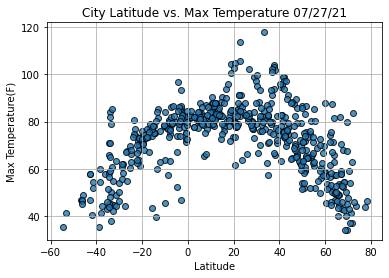

In [17]:
# Import time module
import time

# Build scatter plots
plt.scatter(lats, 
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker ="o",
           alpha = 0.8,
           label = "Cities")

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

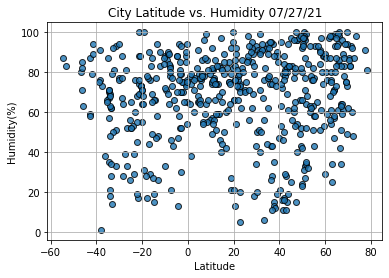

In [18]:
# Build scatter plots
plt.scatter(lats, 
           humidity,
           edgecolor="black",
           linewidths=1,
           marker ="o",
           alpha = 0.8,
           label = "Cities")

# Incorporate other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

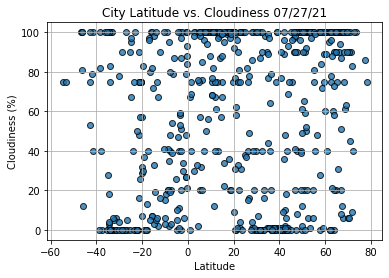

In [19]:
# Build scatter plots
plt.scatter(lats, 
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker ="o",
           alpha = 0.8,
           label = "Cities")

# Incorporate other graph properties
plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

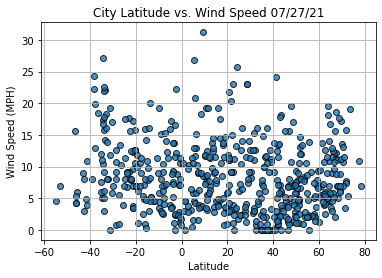

In [20]:
# Build scatter plots
plt.scatter(lats, 
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker ="o",
           alpha = 0.8,
           label = "Cities")

# Incorporate other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()